In [199]:

import os

import numpy as np # linear algebra
import pandas as pd # data processing

In [200]:
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [201]:
df= pd.read_csv("C:/Users/Wommack/Downloads/dementia_dataset.csv")
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [202]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [204]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [205]:
df.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


<AxesSubplot:>

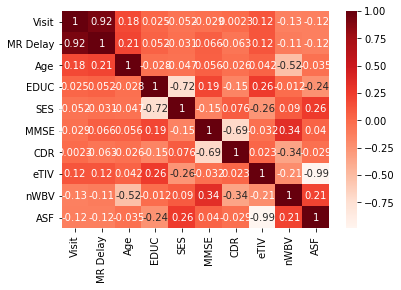

In [206]:
sns.heatmap(df.corr(), annot= True, cmap= 'Reds')

In [207]:
df['Subject ID'].unique()

array(['OAS2_0001', 'OAS2_0002', 'OAS2_0004', 'OAS2_0005', 'OAS2_0007',
       'OAS2_0008', 'OAS2_0009', 'OAS2_0010', 'OAS2_0012', 'OAS2_0013',
       'OAS2_0014', 'OAS2_0016', 'OAS2_0017', 'OAS2_0018', 'OAS2_0020',
       'OAS2_0021', 'OAS2_0022', 'OAS2_0023', 'OAS2_0026', 'OAS2_0027',
       'OAS2_0028', 'OAS2_0029', 'OAS2_0030', 'OAS2_0031', 'OAS2_0032',
       'OAS2_0034', 'OAS2_0035', 'OAS2_0036', 'OAS2_0037', 'OAS2_0039',
       'OAS2_0040', 'OAS2_0041', 'OAS2_0042', 'OAS2_0043', 'OAS2_0044',
       'OAS2_0045', 'OAS2_0046', 'OAS2_0047', 'OAS2_0048', 'OAS2_0049',
       'OAS2_0050', 'OAS2_0051', 'OAS2_0052', 'OAS2_0053', 'OAS2_0054',
       'OAS2_0055', 'OAS2_0056', 'OAS2_0057', 'OAS2_0058', 'OAS2_0060',
       'OAS2_0061', 'OAS2_0062', 'OAS2_0063', 'OAS2_0064', 'OAS2_0066',
       'OAS2_0067', 'OAS2_0068', 'OAS2_0069', 'OAS2_0070', 'OAS2_0071',
       'OAS2_0073', 'OAS2_0075', 'OAS2_0076', 'OAS2_0077', 'OAS2_0078',
       'OAS2_0079', 'OAS2_0080', 'OAS2_0081', 'OAS2_0085', 'OAS2

In [208]:
# Subject_ID is dropped because it is unifor across all instances.
df=df.drop('Subject ID', axis= 1)
df.head()

,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [209]:
# MRI_ID is dropped because it is unifor across all instances.
df['MRI ID'].unique()

array(['OAS2_0001_MR1', 'OAS2_0001_MR2', 'OAS2_0002_MR1', 'OAS2_0002_MR2',
       'OAS2_0002_MR3', 'OAS2_0004_MR1', 'OAS2_0004_MR2', 'OAS2_0005_MR1',
       'OAS2_0005_MR2', 'OAS2_0005_MR3', 'OAS2_0007_MR1', 'OAS2_0007_MR3',
       'OAS2_0007_MR4', 'OAS2_0008_MR1', 'OAS2_0008_MR2', 'OAS2_0009_MR1',
       'OAS2_0009_MR2', 'OAS2_0010_MR1', 'OAS2_0010_MR2', 'OAS2_0012_MR1',
       'OAS2_0012_MR2', 'OAS2_0012_MR3', 'OAS2_0013_MR1', 'OAS2_0013_MR2',
       'OAS2_0013_MR3', 'OAS2_0014_MR1', 'OAS2_0014_MR2', 'OAS2_0016_MR1',
       'OAS2_0016_MR2', 'OAS2_0017_MR1', 'OAS2_0017_MR3', 'OAS2_0017_MR4',
       'OAS2_0017_MR5', 'OAS2_0018_MR1', 'OAS2_0018_MR3', 'OAS2_0018_MR4',
       'OAS2_0020_MR1', 'OAS2_0020_MR2', 'OAS2_0020_MR3', 'OAS2_0021_MR1',
       'OAS2_0021_MR2', 'OAS2_0022_MR1', 'OAS2_0022_MR2', 'OAS2_0023_MR1',
       'OAS2_0023_MR2', 'OAS2_0026_MR1', 'OAS2_0026_MR2', 'OAS2_0027_MR1',
       'OAS2_0027_MR2', 'OAS2_0027_MR3', 'OAS2_0027_MR4', 'OAS2_0028_MR1',
       'OAS2_0028_MR2', '

In [210]:
df=df.drop('MRI ID', axis= 1)
df.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [211]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

Label Encoding of 'Group' Feature

In [212]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Group']= le.fit_transform(df['Group'])
df['Group'].unique()

array([2, 1, 0])

In [213]:
df['Visit'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [214]:
df['M/F'].unique()

array(['M', 'F'], dtype=object)

Binary Encoding of df['M/F']

In [215]:
df['M/F']= df['M/F'].apply(lambda x: 1 if x == 'M' else (0 if x == 'F' else None))

In [216]:
df['M/F'].unique()

array([1, 0], dtype=int64)

In [217]:
df['Hand'].unique()

array(['R'], dtype=object)

the Hand column is dropped because its instances are the same for all rows

In [218]:
df= df.drop('Hand',axis=1)
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [219]:
df['Age'].unique()

array([87, 88, 75, 76, 80, 90, 83, 85, 71, 73, 93, 95, 68, 69, 66, 78, 81,
       82, 77, 86, 92, 84, 72, 61, 64, 74, 60, 62, 91, 79, 89, 70, 94, 97,
       65, 67, 63, 96, 98], dtype=int64)

In [220]:
df['EDUC'].unique()

array([14, 12, 18, 16,  8, 20, 13,  6, 17, 15, 23, 11], dtype=int64)

In [221]:
df['SES'].unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

In [222]:
df['SES'].value_counts()

2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [223]:
np.mean(df['SES'])

2.4604519774011298

Replacing the nan values with the mode=2, since the mean is almost 2.

In [224]:
df['SES']= df['SES'].replace(np.nan, 2)
df['SES'].unique()

array([2., 3., 4., 1., 5.])

In [225]:
#df['SES'].value_counts()

In [226]:
df['MMSE'].unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [227]:
print(df['MMSE'].mode())#,"\n",
print(df['MMSE'].mean())#,"\n",
print(df['MMSE'].value_counts())

0    30.0
dtype: float64
27.342318059299192
30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
23.0     11
21.0     11
20.0      7
22.0      7
17.0      5
24.0      4
16.0      3
19.0      3
15.0      2
18.0      2
7.0       1
4.0       1
Name: MMSE, dtype: int64


In [228]:
df['MMSE'].mean()

27.342318059299192

In [229]:
df['MMSE'].isnull().sum()

2

Replacing the nan values with the mode=30, since nan values are 2 and mode =30.

In [230]:
df['MMSE']= df['MMSE'].replace(np.nan, 30)
df['MMSE'].unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18.])

In [231]:
df['CDR'].unique()

array([0. , 0.5, 1. , 2. ])

In [232]:
df['eTIV'].unique()

array([1987, 2004, 1678, 1738, 1698, 1215, 1200, 1689, 1701, 1699, 1357,
       1365, 1372, 1272, 1257, 1457, 1480, 1447, 1482, 1333, 1323, 1230,
       1212, 1225, 1602, 1590, 1651, 1668, 1783, 1814, 1820, 1813, 1406,
       1398, 1423, 1587, 1606, 1597, 1911, 1926, 1313, 1316, 1247, 1250,
       1420, 1445, 1360, 1358, 1353, 1547, 1562, 1377, 1390, 1402, 1392,
       1430, 1463, 1307, 1311, 1466, 1450, 1460, 1453, 1336, 1329, 1359,
       1361, 1349, 1477, 1487, 1483, 1485, 1174, 1179, 1310, 1320, 1348,
       1289, 1295, 1314, 1640, 1665, 1451, 1331, 1332, 1317, 1322, 1476,
       1433, 1414, 1695, 1708, 1712, 1714, 1491, 1505, 1503, 1461, 1454,
       1474, 1484, 1500, 1264, 1275, 1362, 1456, 1599, 1569, 1580, 1315,
       1308, 1324, 1416, 1408, 1654, 1660, 1681, 1641, 1664, 1667, 1462,
       1459, 1464, 1957, 1928, 1440, 1438, 1455, 1444, 1428, 1475, 1470,
       1471, 1692, 1707, 1724, 1720, 1391, 1524, 1512, 1507, 1490, 1504,
       1151, 1143, 1536, 1520, 1848, 1931, 1631, 16

In [233]:
df['nWBV'].unique()

array([0.696, 0.681, 0.736, 0.713, 0.701, 0.71 , 0.718, 0.712, 0.711,
       0.705, 0.748, 0.727, 0.698, 0.703, 0.806, 0.791, 0.769, 0.752,
       0.738, 0.715, 0.72 , 0.697, 0.66 , 0.646, 0.759, 0.755, 0.761,
       0.693, 0.677, 0.666, 0.719, 0.805, 0.796, 0.662, 0.652, 0.695,
       0.783, 0.782, 0.775, 0.772, 0.737, 0.717, 0.734, 0.735, 0.822,
       0.817, 0.679, 0.676, 0.684, 0.733, 0.789, 0.773, 0.778, 0.729,
       0.709, 0.706, 0.742, 0.724, 0.771, 0.768, 0.76 , 0.766, 0.777,
       0.757, 0.685, 0.678, 0.731, 0.75 , 0.723, 0.691, 0.682, 0.794,
       0.788, 0.689, 0.744, 0.683, 0.837, 0.827, 0.756, 0.739, 0.707,
       0.747, 0.688, 0.721, 0.694, 0.722, 0.7  , 0.687, 0.69 , 0.728,
       0.704, 0.787, 0.774, 0.743, 0.741, 0.725, 0.674, 0.67 , 0.686,
       0.751, 0.792, 0.672, 0.661, 0.692, 0.758, 0.699, 0.78 , 0.762,
       0.781, 0.732, 0.708, 0.77 , 0.754, 0.726, 0.749, 0.74 , 0.669,
       0.663, 0.644, 0.68 , 0.786, 0.767, 0.812, 0.795, 0.819, 0.81 ,
       0.746, 0.716,

In [234]:
df['ASF'].unique()

array([0.883, 0.876, 1.046, 1.01 , 1.034, 1.444, 1.462, 1.039, 1.032,
       1.033, 1.293, 1.286, 1.279, 1.38 , 1.396, 1.205, 1.186, 1.213,
       1.184, 1.316, 1.326, 1.327, 1.427, 1.448, 1.433, 1.096, 1.104,
       1.063, 1.052, 0.985, 0.968, 0.964, 1.248, 1.255, 1.234, 1.106,
       1.093, 1.099, 0.919, 0.911, 1.337, 1.333, 1.407, 1.405, 1.236,
       1.214, 1.291, 1.297, 1.134, 1.124, 1.275, 1.263, 1.252, 1.261,
       1.227, 1.215, 1.199, 1.342, 1.339, 1.197, 1.21 , 1.202, 1.208,
       1.313, 1.32 , 1.29 , 1.301, 1.188, 1.18 , 1.181, 1.495, 1.488,
       1.329, 1.302, 1.362, 1.356, 1.335, 1.07 , 1.054, 1.317, 1.318,
       1.332, 1.189, 1.183, 1.225, 1.242, 1.036, 1.028, 1.025, 1.024,
       1.177, 1.166, 1.168, 1.207, 1.19 , 1.17 , 1.388, 1.376, 1.289,
       1.285, 1.098, 1.118, 1.111, 1.341, 1.239, 1.247, 1.061, 1.057,
       1.044, 1.069, 1.055, 1.053, 1.228, 1.2  , 1.203, 0.897, 0.91 ,
       1.219, 1.22 , 1.206, 1.229, 1.194, 1.193, 1.037, 1.018, 1.02 ,
       1.262, 1.151,

In [235]:
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [236]:
X= df.drop('Group', axis=1)
y=df['Group']

In [237]:
print(X.shape, y.shape)

(373, 11) (373,)


BASE MODEL

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 48 )

In [240]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn import metrics
import random as rd
models = [("LR", LinearRegression()),
          ("Naive Bayes", GaussianNB()),
          ("KNN", KNeighborsClassifier()),
          ("DTC", DecisionTreeClassifier()),
          ("SGD", SGDClassifier()),
          ("Ada", AdaBoostClassifier()),
          ("RFC",RandomForestClassifier()),
          ("Extra:",ExtraTreesClassifier()),
          #("SVC", SVC()),#has no feature importances
          ("XGBoost:", xgb.XGBClassifier())
         ]

 

NameError: name 'xgb' is not defined

In [ ]:
def model_evaluation(X,y):
    X_train,X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 48 )
    models = [#("LR", LinearRegression()),
        ("Naive Bayes", GaussianNB()),
          ("KNN", KNeighborsClassifier()),
          ("DTC", DecisionTreeClassifier()),
          ("SGD", SGDClassifier()),
          ("Ada", AdaBoostClassifier()),
          ("RFC",RandomForestClassifier()),
          ("Extra:",ExtraTreesClassifier()),
          ("XGB:", xgb.XGBClassifier())
              
              
         ]
    means = []
    stds = []

    for name, classifier in models:
        scores = []
        for _ in range(10):
            model = classifier
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            Accuracy=metrics.accuracy_score(y_test,y_pred)

            scores.append(Accuracy)

        means.append(np.mean(scores))
        stds.append(np.std(scores))
        
    Total = list(zip(means,stds))
    hsh = {}
    for j in range(len(models)):
        hsh[models[j][0]] = list(Total[j])

    data = pd.DataFrame(hsh)
    db=data.transpose()
    db.columns=['mean','std']
    
    return db


In [ ]:
a=model_evaluation(X, y)
print(a)

                 mean           std
Naive Bayes  0.901786  1.110223e-16
KNN          0.464286  0.000000e+00
DTC          0.827679  5.717075e-03
SGD          0.429464  9.342631e-02
Ada          0.508929  0.000000e+00
RFC          0.897321  4.464286e-03
Extra:       0.907143  5.922544e-03


In [ ]:
model= RandomForestClassifier()
model.fit(X_train, y_train)




y_pred = model.predict(X_test)
feature_imp= pd.Series(model.feature_importances_, index= X.columns).sort_values(ascending=False)
feature_imp*100

CDR         41.689325
MMSE        15.478722
nWBV         8.063134
eTIV         6.109047
MR Delay     5.847592
Age          5.546009
ASF          5.452777
EDUC         4.377286
M/F          2.935360
SES          2.372513
Visit        2.128235
dtype: float64

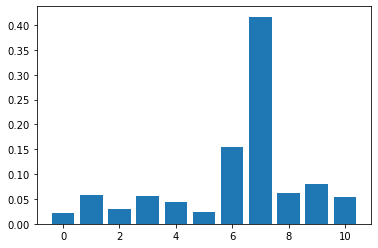

In [ ]:
#Choosing Features with values above the mean
from matplotlib import pyplot
pyplot.bar([x for x in range(len(model.feature_importances_))], model.feature_importances_)
pyplot.show()

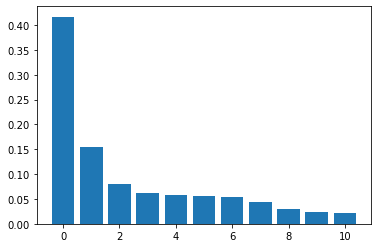

In [ ]:
#Choosing Features with values above the mean
from matplotlib import pyplot
pyplot.bar([x for x in range(len(feature_imp))], feature_imp)
pyplot.show()

Choosing Top Two Features of NONE

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
#split the dataset into features and labels
X1=df[['CDR','MMSE']]

y1=y

X1= scaler.fit_transform(X1)
         
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.30, random_state=45)
 

In [ ]:
b=model_evaluation(df[['CDR','ASF', 'eTIV']], y)
print(b)

                 mean           std
Naive Bayes  0.901786  1.110223e-16
KNN          0.544643  1.110223e-16
DTC          0.809821  4.091585e-03
SGD          0.455357  7.142857e-02
Ada          0.508929  0.000000e+00
RFC          0.811607  2.678571e-03
Extra:       0.800000  9.942436e-03


In [ ]:
model= AdaBoostClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
feature_imp= pd.Series(model.feature_importances_, index= X.columns).sort_values(ascending=False)
feature_imp=feature_imp*100
feature_imp

CDR         50.0
eTIV        36.0
ASF         14.0
nWBV         0.0
MMSE         0.0
SES          0.0
EDUC         0.0
Age          0.0
M/F          0.0
MR Delay     0.0
Visit        0.0
dtype: float64

In [ ]:
#split the dataset into features and labels
X2=df[['CDR','ASF', 'eTIV']]

y2=y

X2= scaler.fit_transform(X2)
         
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.30, random_state=45)
 

In [ ]:
c=model_evaluation(X2, y)
print(c)

                 mean           std
Naive Bayes  0.901786  1.110223e-16
KNN          0.883929  0.000000e+00
DTC          0.791071  4.374089e-03
SGD          0.901786  1.110223e-16
Ada          0.508929  0.000000e+00
RFC          0.795536  6.250000e-03
Extra:       0.797321  8.035714e-03


In [ ]:
d=model_evaluation( df.drop('Group', axis=1),df['Group'])
print(d)

                 mean           std
Naive Bayes  0.901786  1.110223e-16
KNN          0.464286  0.000000e+00
DTC          0.833929  8.183171e-03
SGD          0.420536  8.743164e-02
Ada          0.508929  0.000000e+00
RFC          0.898214  4.374089e-03
Extra:       0.906250  4.464286e-03


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures=SelectKBest(score_func=mutual_info_classif, k=10)

fit= bestfeatures.fit(X,y)

In [ ]:
dfscores =pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores= pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Attri', 'Score'] #naming the dataframe columns
featureScores

,Attri,Score
0,Visit,0.000000
1,MR Delay,0.017297
2,M/F,0.001219
3,Age,0.000000
4,EDUC,0.093149
5,SES,0.068184
6,MMSE,0.309669
7,CDR,0.612347
8,eTIV,0.089139
9,nWBV,0.087857


In [ ]:
print(featureScores.nlargest(10, 'Score')) #print 5 best features

       Attri     Score
7        CDR  0.612347
6       MMSE  0.309669
4       EDUC  0.093149
8       eTIV  0.089139
9       nWBV  0.087857
10       ASF  0.087163
5        SES  0.068184
1   MR Delay  0.017297
2        M/F  0.001219
0      Visit  0.000000


FEATURES SELECTION WITH F_CLASSIF

In [ ]:
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures=SelectKBest(score_func=f_classif, k=10)

fit_f= bestfeatures.fit(X,y)

In [ ]:
dfscores_f =pd.DataFrame(fit_f.scores_)
dfcolumns_f=pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores_f= pd.concat([dfcolumns_f, dfscores_f], axis=1)
featureScores_f.columns=['Attri', 'Score'] #naming the dataframe columns
#featureScores_f

In [ ]:
print(featureScores_f.nlargest(5, 'Score')) #print 5 best features

  Attri       Score
7   CDR  436.908989
6  MMSE  107.216426
9  nWBV   20.581034
4  EDUC   13.485719
2   M/F   13.413107


FEATURE SELECTION USING RECURSIVE FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import RFECV
#Init, fit
rfecv= RFECV(
    estimator= RandomForestClassifier(),
    min_features_to_select=1,
    step=5,
    n_jobs= -1,
    scoring="r2",
    cv=5,
)

rfecv_fit= rfecv.fit(X_train, y_train)

In [ ]:
X_train_rf=X_train.columns[rfecv.support_]
X_train_rf

Index(['Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

In [ ]:
b=model_evaluation(df[['MR Delay', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']], y)
print(b)


                 mean       std
Naive Bayes  0.857143  0.000000
KNN          0.464286  0.000000
DTC          0.849107  0.011607
SGD          0.491071  0.088659
Ada          0.508929  0.000000
RFC          0.873214  0.006682
Extra:       0.874107  0.002679


In [ ]:
NB=GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
Predictions= NB.predict(X_test)

c:\Users\Wommack\Anaconda3\Anaconda4\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Group', ylabel='Density'>

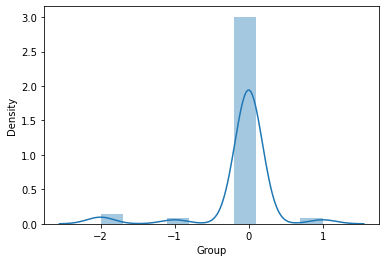

In [ ]:
sns.distplot(y_test-Predictions)

sns.scatterplot(y_test, Predictions)

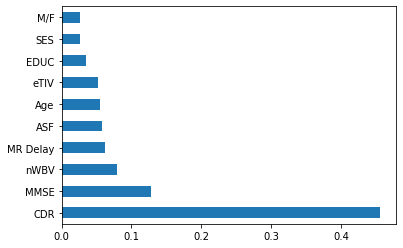

In [ ]:
model= RandomForestClassifier()
model.fit(X_train, y_train)

#plot graphe of feature importances for better visualization
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)

#plot graphe of feature importances for better visualization
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

NameError: name 'xgb' is not defined

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X_train, y_train)

#plot graphe of feature importances for better visualization
feat_importances= pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#CONCLUSION
#CDR is the most important factor in predicting dementia.
#Visit is the least import factor in predicring dementia according to Randpm classifier
#ASF is the least import factor in predicring dementia according to XGBoost
#SES is the least import factor in predicring dementia according to ExtraTreesClassifier 

